# ATIVIDADE PRÁTICA 3 - IF69P - Processamento de Imagens - C81
## Vinicius Augusto de Souza - 1997530

-------------------------------------------------------------------------------------------------------------------------------

##  ---*--- Especificação do Problema ---*---

### Escreva um programa para aplicar os seguintes algoritmos de limiarização:

#### Observação: Para ambas as técnicas forneça possibilidades de aplicação de diferentes políticas de limiarização (Binária, Trucada, Zero).

In [29]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image

### a) Ridler e Calvard

#### Binary Threshold

In [2]:
f = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
x,y = f.shape

In [3]:
f_array = f.flatten()
size_array = len(f_array)
T_anterior = 0
T_novo = np.mean(f_array)

In [4]:
K = f.max()
R1 = []
R2 = []
μ1 = 0
μ2 = 0

# Ridler Calvard
delta = 0.01
while abs(T_anterior - T_novo) > delta:
    T_anterior = T_novo
    for i in range(x):
        for j in range(y):
            if(f[i][j] < T_anterior):
                R1.append(f[i][j])
                
            else:
                R2.append(f[i][j])
    μ1 = np.mean(R1)
    μ2 = np.mean(R2)
    T_novo = np.mean([μ1, μ2])
    
#BINARY METHOD
for i in range(x-1):
    for j in range(y-1):
        if(f[i][j] > T_novo):
            f[i][j] = K
        else:
            f[i][j] = 0

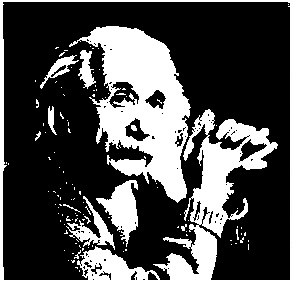

In [5]:
cv2.imwrite("f_RC_binary_threshold.jpg",f)
Image(filename='f_RC_binary_threshold.jpg')

#### ToZero Threshold

In [6]:
f = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
x,y = f.shape

In [7]:
f_array = f.flatten()
size_array = len(f_array)
T_anterior = 0
T_novo = np.mean(f_array)

In [8]:
K = f.max()
R1 = []
R2 = []
μ1 = 0
μ2 = 0

# Ridler Calvard
delta r= 0.01
while abs(T_anterior - T_novo) > delta:
    T_anterior = T_novo
    for i in range(x):
        for j in range(y):
            if(f[i][j] < T_anterior):
                R1.append(f[i][j])
                
            else:
                R2.append(f[i][j])
    μ1 = np.mean(R1)
    μ2 = np.mean(R2)
    T_novo = np.mean([μ1, μ2])

#TO ZERO METHOD
for i in range(x):
    for j in range(y):
        if(f[i][j] > T_novo):
            f[i][j] = f[i][j]
        else:
            f[i][j] = 0

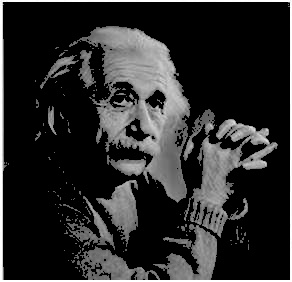

In [9]:
cv2.imwrite("f_RC_toZero_threshold.jpg",f)
Image(filename='f_RC_toZero_threshold.jpg')

#### Truncate Threshold

In [10]:
f = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
x,y = f.shape

In [11]:
f_array = f.flatten()
size_array = len(f_array)
T_anterior = 0
T_novo = np.mean(f_array)

In [12]:
K = f.max()
R1 = []
R2 = []
μ1 = 0
μ2 = 0

# Ridler Calvard
delta = 0.01
while abs(T_anterior - T_novo) > delta:
    T_anterior = T_novo
    for i in range(x):
        for j in range(y):
            if(f[i][j] < T_anterior):
                R1.append(f[i][j])
                
            else:
                R2.append(f[i][j])
    μ1 = np.mean(R1)
    μ2 = np.mean(R2)
    T_novo = np.mean([μ1, μ2])

# TRUNCATE METHOD
for i in range(x):
    for j in range(y):
        if(f[i][j] > T_novo):
            f[i][j] = T_novo
        else:
            f[i][j] = f[i][j]

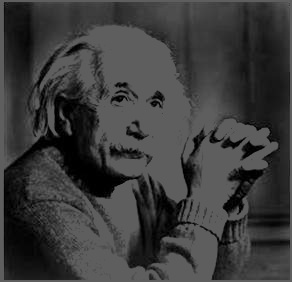

In [13]:
cv2.imwrite("f_RC_truncate_threshold.jpg",f)
Image(filename='f_RC_truncate_threshold.jpg')

-------------------------------------------------------------------------------------------------------------------------------

### b) Otsu

In [40]:
threshold_values = {}
h = [1]

In [41]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
    plt.show()
    return y

In [42]:
def ContadorPixels(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
            cnt += h[i]
    return cnt

In [43]:
def Peso(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w

In [44]:
def Media(s, e):
    m = 0
    w = Peso(s, e)
    for i in range(s, e):
        m += h[i] * i
    return m/float(w)

In [45]:
def Variancia(s, e):
    v = 0
    m = Media(s, e)
    w = Peso(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v

In [46]:
def threshold(h):
    cnt = ContadorPixels(h)
    for i in range(1, len(h)):
        vb = Variancia(0, i)
        wb = Peso(0, i) / float(cnt)
        mb = Media(0, i)
        
        vf = Variancia(i, len(h))
        wf = Peso(i, len(h)) / float(cnt)
        mf = Media(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w

In [47]:
def ThresholdOtimo():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print ('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]

#### Binary Threshold

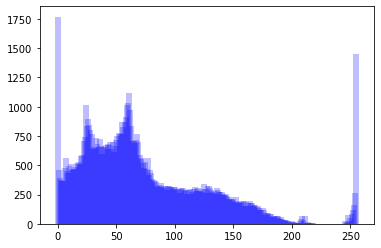

optimal threshold 97


In [50]:
# OTSU 
f_binary = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
K_binary = f_binary.max()
x,y = f_binary.shape
f_binary_array = np.asarray(f_binary)
h_binary = Hist(f_binary_array)
threshold(h_binary)
op_thres_binary = ThresholdOtimo()

# BINARY METHOD
for i in range(x-1):
    for j in range(y-1):
        if(f_binary[i][j] > op_thres_binary):
            f_binary[i][j] = K_binary
        else:
            f_binary[i][j] = 0

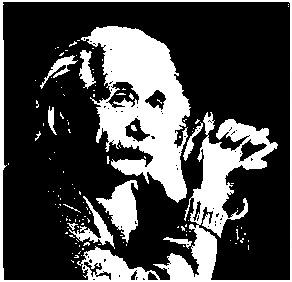

In [51]:
cv2.imwrite("f_OTSU_binary_threshold.jpg",f_binary)
Image(filename='f_OTSU_binary_threshold.jpg')

#### ToZero Threshold

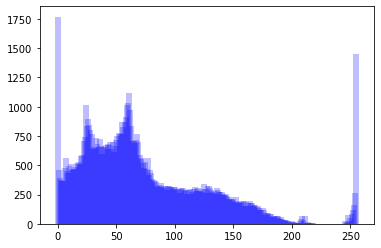

optimal threshold 97


In [52]:
# OTSU
f_tzero = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
K_tzero = f_tzero.max()
x,y = f_tzero.shape
f_tzero_array = np.asarray(f_tzero)
h_tzero = Hist(f_tzero_array)
threshold(h_tzero)
op_thres_tzero = ThresholdOtimo()

# TO ZERO METHOD
for i in range(x):
    for j in range(y):
        if(f_tzero[i][j] > op_thres_tzero):
            f_tzero[i][j] = f_tzero[i][j]
        else:
            f_tzero[i][j] = 0

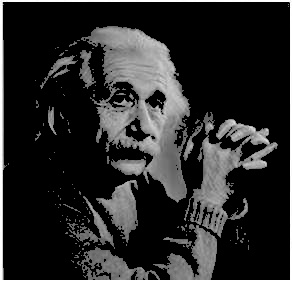

In [53]:
cv2.imwrite("f_OTSU_tozero_threshold.jpg",f_tzero)
Image(filename='f_OTSU_tozero_threshold.jpg')

#### Truncate Threshold

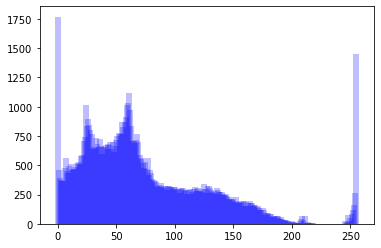

optimal threshold 97


In [54]:
# OTSU
f_truncate = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
K_truncate = f_truncate.max()
x,y = f_truncate.shape
f_truncate_array = np.asarray(f_truncate)
h_truncate = Hist(f_truncate_array)
threshold(h_truncate)
op_thres_truncate = ThresholdOtimo()

# TRUNCATE METHOD
for i in range(x):
    for j in range(y):
        if(f_truncate[i][j] > op_thres_truncate):
            f_truncate[i][j] = op_thres_truncate
        else:
            f_truncate[i][j] = f_truncate[i][j]

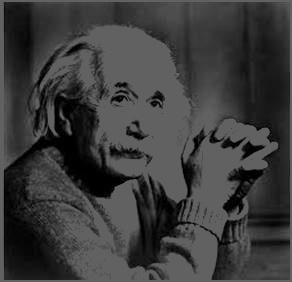

In [55]:
cv2.imwrite("f_OTSU_truncate_threshold.jpg",f_truncate)
Image(filename='f_OTSU_truncate_threshold.jpg')